# Project Title: Movie Recommendation Engine

# Importing Basic Libraries

In [190]:
# For mathematical calculations and data exploration

import numpy as np
import pandas as pd

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# for Interactive Shells

from IPython.display import display

# setting up the chart size and background

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [23]:
# Importing the dataset

data=pd.read_csv('movie_metadata.csv')

In [24]:
# First 5 values of dataset

data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [15]:
# Last 5 values of dataset

data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [16]:
# List of all column names in dataset

data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [17]:
# Total number of rows and columns

data.shape

(5043, 28)

In [18]:
# Dropping few columns in dataset which are not needed

data=data.drop(['color','director_facebook_likes',
                'actor_3_facebook_likes',
                'actor_1_facebook_likes',
                'cast_total_facebook_likes', 
                'actor_2_facebook_likes',
                'facenumber_in_poster',
                'content_rating',
                'country',
                'movie_imdb_link',
                'aspect_ratio',
                'plot_keywords'], axis=1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [121]:
# Remaining number of columns in dataset after removal of few columns which are not needed

data.shape

(5043, 16)

In [122]:
# Total number of null values in dataset

data.isna().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

## Data Pre-processing

In [123]:
# Rows which have highest percentage of missing values

round(data.isnull().mean()*100,2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [25]:
# Since the columns'Gross' and 'Budget' have more percentage of missing values, 
# lets drop all the rows with null values in these columns

data=data[~np.isnan(data['gross'])]
data=data[~np.isnan(data['budget'])]

# After dropping null values, the in these two columns, the data looks as:

data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [125]:
# Imputing the null values

# Using mean for numerical columns

data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace=True)

# Using mode for numerical columns

data['language'].fillna(data['language'].mode()[0], inplace=True)

#Since statistical values cannot be used for imputing actor names, we'll replace the names with "unknown actor"

data['actor_1_name'].fillna('Unknown Actor', inplace=True)
data['actor_2_name'].fillna('Unknown Actor', inplace=True)
data['actor_3_name'].fillna('Unknown Actor', inplace=True)

# The total missing values after imputing all null values:

data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

## Feature Engineering

In [27]:
# In order to make analysis simple, let's convert gross & budget from dollars to million dollars

data['gross']=data['gross']/1000000
data['budget']=data['budget']/1000000

In [28]:
# Creating another column "Profit" using budget and gross

data['Profit']=data['gross']-data['budget']

In [29]:
# Listing out first 20 profitable movies according to high profit to low profit order

data[['Profit', 'movie_title']].sort_values(by='Profit', ascending=False).head(20)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [99]:
# lets check the total number of movies in different languages

data['language'].value_counts()

English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Thai             3
Danish           3
Hebrew           3
Dutch            3
Aboriginal       2
Dari             2
Indonesian       2
Vietnamese       1
Maya             1
Swedish          1
Telugu           1
Mongolian        1
Czech            1
Zulu             1
Arabic           1
Bosnian          1
Filipino         1
Aramaic          1
Romanian         1
Kazakh           1
Russian          1
Dzongkha         1
Hungarian        1
None             1
Icelandic        1
Name: language, dtype: int64

In [100]:
# From the above list, we can find that maximum number of movies are in Enlish language
# Therefore, lets arrange the languages into two sets: English (since max movies are in English) and Foreign (rest all movies)

def language(x):
    if x=='English':
        return 'English'
    else:
        return 'Foreign'

# Applying the above function on the language column

data['language']=data['language'].apply(language)

# Lets check the top Foreign movies based on IMDB score

data[data['language']=='Foreign'][
    ['language', 'movie_title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10)

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
3931,Foreign,Samsara,8.5
4259,Foreign,The Lives of Others,8.5
4921,Foreign,Children of Heaven,8.5
2970,Foreign,Das Boot,8.4
4659,Foreign,A Separation,8.4
1298,Foreign,Amélie,8.4


In [101]:
# Lets check the top English movies based on IMDB score

data[data['language']=='English'][
    ['language','movie_title','imdb_score']].sort_values(by='imdb_score', ascending=False,).head(10)

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
3355,English,Pulp Fiction,8.9
97,English,Inception,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8
683,English,Fight Club,8.8


In [102]:
# Since the user interest might also vary depending upon duration of the movie, lets categorize as below:

def duration(x):
    if x<=120:
        return 'Short'
    else:
        return 'Long'

# Applying the above function on the duration column

data['duration']=data['duration'].apply(duration)

# lets check the total values of Duration column

data['duration'].value_counts()

Short    2968
Long      923
Name: duration, dtype: int64

In [66]:
# Check the total values in Genre column

data['genres'].value_counts()[:10]

Drama                          154
Comedy|Drama|Romance           151
Comedy|Drama                   148
Comedy                         147
Comedy|Romance                 136
Drama|Romance                  120
Crime|Drama|Thriller            83
Action|Crime|Thriller           56
Action|Crime|Drama|Thriller     50
Action|Adventure|Sci-Fi         48
Name: genres, dtype: int64

In [67]:
# Since, there are many different genres and a single movie may have different genres, we shall categorize genres into 4 sections

data['Moviegenres']=data['genres'].str.split('|')
data['Genre1']=data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well

data['Genre2']=data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3']=data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4']=data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the categorized data

data[['genres', 'Genre1', 'Genre2', 'Genre3', 'Genre4']][:10]

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action
6,Action|Adventure|Romance,Action,Adventure,Romance,Action
7,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Adventure,Animation,Comedy,Family
8,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action
9,Adventure|Family|Fantasy|Mystery,Adventure,Family,Fantasy,Mystery
10,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


## Data Visualization

In [33]:
# Let's create a column "Social_media_popularity"
# Caluculate "Social_media_popularity" by aggregating the columns: no. of voted users, no. of user reviews, facebook likes

data['Social_media_popularity']=(data['num_user_for_reviews']/data['num_voted_users'])*data['movie_facebook_likes']

# Let's check Top 10 popular movies based on 'social media popularity'

x=data[['movie_title', 'Social_media_popularity']].sort_values(by='Social_media_popularity', ascending=False).head(10).reset_index()

print(x)

   index                          movie_title  Social_media_popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


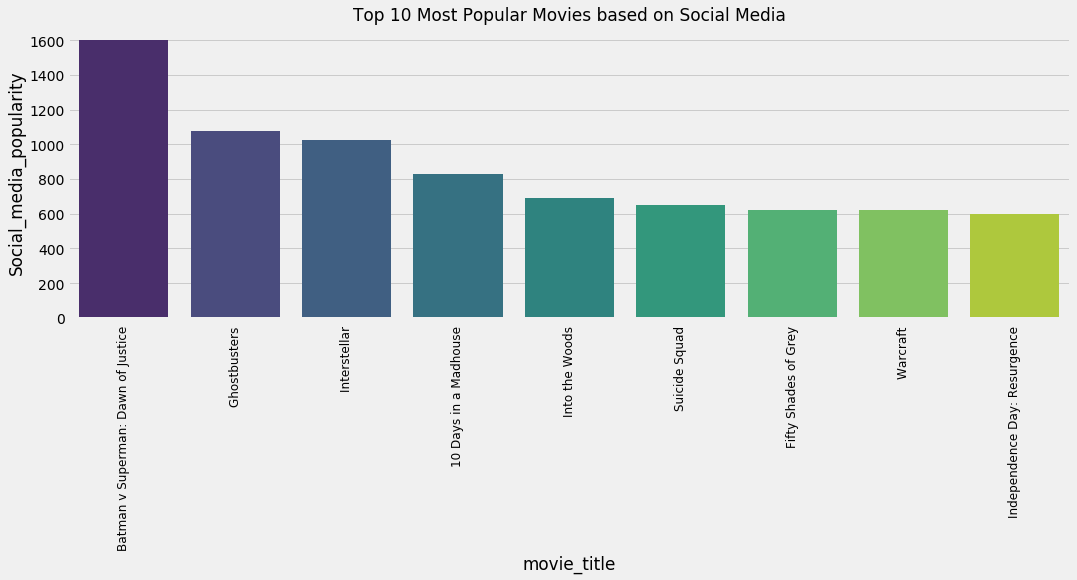

In [64]:
# Visualize the above data using barplot

sns.barplot(x['movie_title'], x['Social_media_popularity'], palette="viridis")
plt.title('Top 10 Most Popular Movies based on Social Media', fontsize=17)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [76]:
# Comparing the 'Gross' with 'Genres'

# Firstly, let's display and group the genres and find maximum, minimum and avgerage gross of the movies for that genre

display(data[['Genre1','gross']].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap='Wistia'))

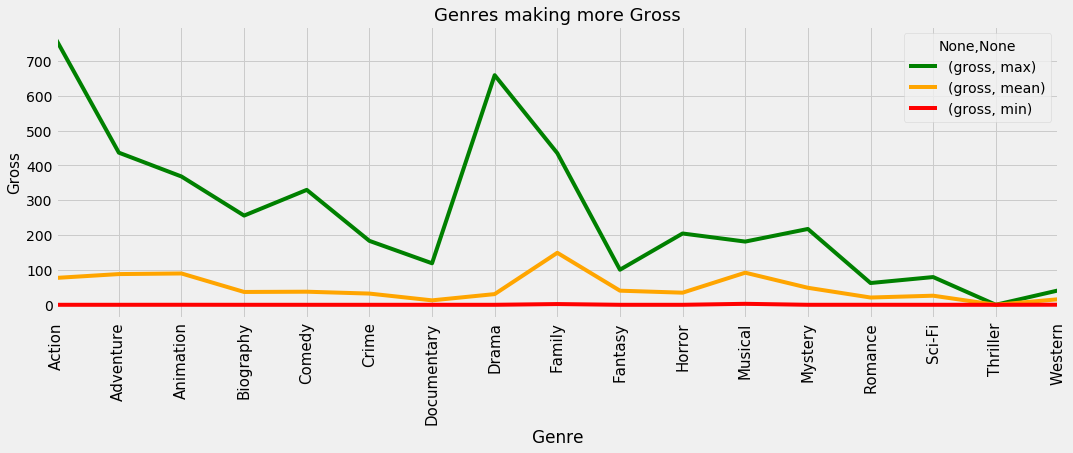

In [83]:
# Lets plot the above data using lineplot

data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['green','orange','red'])
plt.title('Genres making more Gross', fontsize=18)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation=90, fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.xlabel('Genre')
plt.show()

In [96]:
# Display the most popular movie from each genre

display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

,Genre1,movie_title,gross
0,Action,Avatar,760.506
509,Adventure,The Lion King,422.784
521,Animation,Despicable Me 2,368.05
1403,Biography,The Blind Side,255.95
836,Comedy,Forrest Gump,329.691
3466,Crime,The Godfather,134.822
3583,Documentary,Fahrenheit 9/11,119.078
26,Drama,Titanic,658.672
3080,Family,E.T. the Extra-Terrestrial,434.949
2485,Fantasy,The Others,96.4718


In [105]:
# Let's check Profitable years by converting years into integers

data['title_year']=data['title_year'].astype('int')

display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

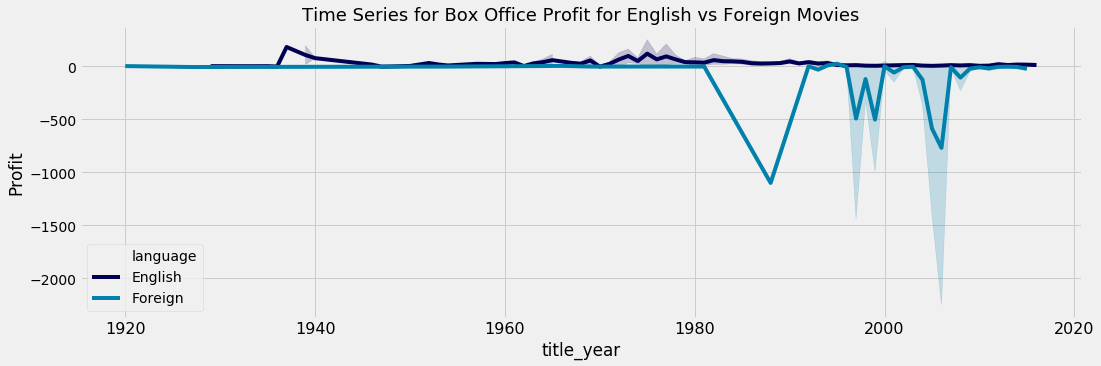

In [122]:
# Let's plot the above data using lineplot

sns.lineplot(data['title_year'], data['Profit'], hue = data['language'], palette='ocean')
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 18)
plt.xticks(fontsize = 16)
plt.show()

In [128]:
# Movies which made huge loss

display(data[data['Profit']<-2000][['movie_title', 'language', 'Profit']].style.background_gradient(cmap='Reds'))

,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.7
2334,Steamboy,Foreign,-2127.11
2988,The Host,Foreign,-12213.3
3005,Fateless,Foreign,-2499.8
3859,Lady Vengeance,Foreign,-4199.79


In [137]:
# Comparing the gross and profit for duration

display(data[data['duration']=='Long'][['movie_title','duration','gross','Profit']].sort_values(by='Profit',
                                    ascending=False).head(10).style.background_gradient(cmap='PuBu'))

display(data[data['duration']=='Short'][['movie_title','duration','gross','Profit']].sort_values(by='Profit',
                                    ascending=False).head(10).style.background_gradient(cmap='PuBu'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.506,523.506
29,Jurassic World,Long,652.177,502.177
26,Titanic,Long,658.672,458.672
3024,Star Wars: Episode IV - A New Hope,Long,460.936,449.936
17,The Avengers,Long,623.28,403.28
794,The Avengers,Long,623.28,403.28
240,Star Wars: Episode I - The Phantom Menace,Long,474.545,359.545
66,The Dark Knight,Long,533.316,348.316
439,The Hunger Games,Long,407.999,329.999
186,The Hunger Games: Catching Fire,Long,424.646,294.646


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949,424.449
509,The Lion King,Short,422.784,377.784
812,Deadpool,Short,363.024,305.024
521,Despicable Me 2,Short,368.05,292.05
338,Finding Nemo,Short,380.839,286.839
582,Shrek 2,Short,436.471,286.471
2601,Home Alone,Short,285.761,267.761
563,Minions,Short,336.03,262.03
1181,The Sixth Sense,Short,293.502,253.502
125,Frozen,Short,400.737,250.737


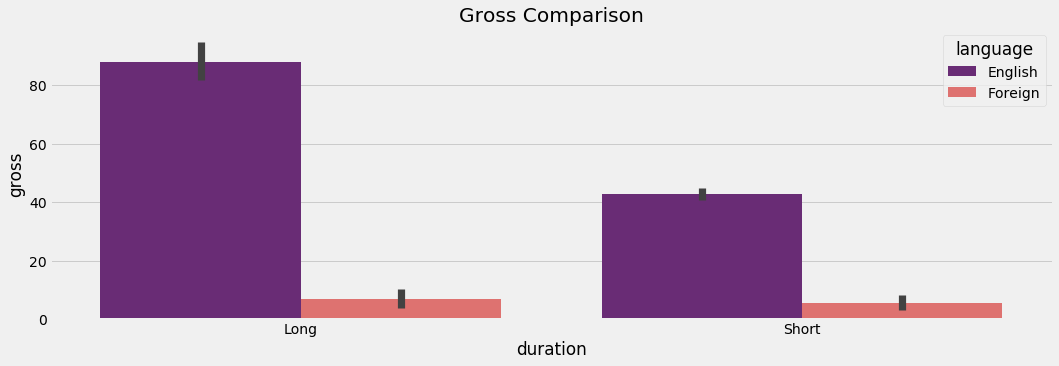

In [144]:
# Visualize the above output using barplot

sns.barplot(data['duration'], data['gross'], hue=data['language'], palette='magma')
plt.title('Gross Comparison')
plt.show()

In [152]:
# Calculating average Imdb score for long and short duration movies

print("Avg. Imdb rating for long duration movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))

print("Avg. Imdb rating for long duration movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

Avg. Imdb rating for long duration movies is 7.06
Avg. Imdb rating for long duration movies is 6.28


In [158]:
# Calculating Highest rated movies under Long and Short duration

print("\nHighest rated long duration movie\n", data[data['duration']=='Long'][['movie_title','imdb_score']].sort_values(
                           by='imdb_score', ascending=False).head(1))

print("\nHighest rated short duration movie\n", data[data['duration']=='Short'][['movie_title','imdb_score']].sort_values(
                           by='imdb_score', ascending=False).head(1))


Highest rated long duration movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest rated short duration movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6


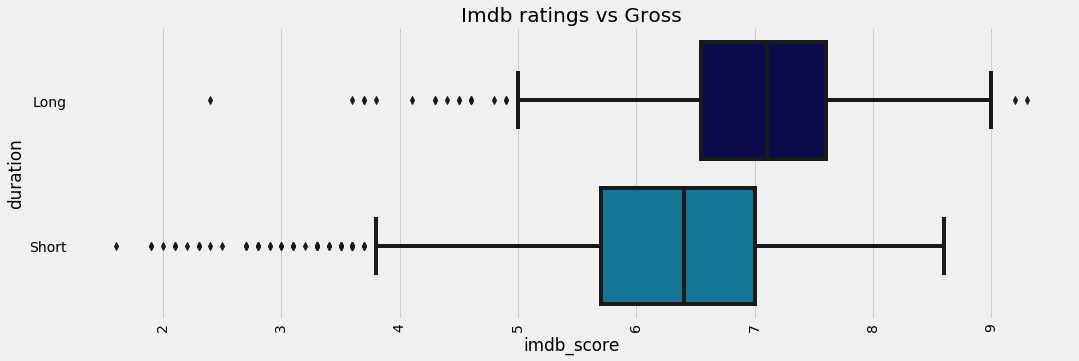

In [164]:
# Representing Imbd rating vs Gross using boxplot

sns.boxplot(data['imdb_score'], data['duration'], palette='ocean')
plt.title('Imdb ratings vs Gross')
plt.xticks(rotation=90)
plt.show()

# Querying the Data

In [166]:
def query_actors(x):
    a=data[data['actor_1_name']==x]
    b=data[data['actor_2_name']==x]
    c=data[data['actor_3_name']==x]
    x=a.append(b)
    y=x.append(c)
    
    y=y[['movie_title','budget','gross','title_year','imdb_score']].reset_index(drop=True).sort_values(
                                                              by='imdb_score', ascending=False)
    return y

In [169]:
# Displaying list of actors

data['actor_1_name'].value_counts().index

Index(['Robert De Niro', 'Johnny Depp', 'J.K. Simmons', 'Nicolas Cage',
       'Denzel Washington', 'Matt Damon', 'Bruce Willis', 'Liam Neeson',
       'Robert Downey Jr.', 'Robin Williams',
       ...
       'Julia Jentsch', 'Kelsey Grammer', 'Lawrence Gilliard Jr.',
       'Shahab Hosseini', 'Alice Krige', 'Todd Stashwick', 'John August',
       'Jamie Renée Smith', 'Matt Lucas', 'Tom Burke'],
      dtype='object', length=1509)

In [170]:
# After applying the above function, we can see the information with respect to individual actors 

query_actors('Robin Williams')

,movie_title,budget,gross,title_year,imdb_score
22,Good Will Hunting,10.0,138.339411,1997,8.3
14,Aladdin,28.0,217.350219,1992,8.0
18,Dead Poets Society,16.4,95.860116,1989,8.0
16,August Rush,30.0,31.655091,2007,7.5
20,"Good Morning, Vietnam",13.0,123.922370,1987,7.3
24,House of D,6.0,0.371081,2004,7.0
7,What Dreams May Come,85.0,55.350897,1998,7.0
15,Mrs. Doubtfire,25.0,219.200000,1993,6.9
4,Bicentennial Man,100.0,58.220776,1999,6.8
21,One Hour Photo,12.0,31.597131,2002,6.8


In [171]:
import warnings
warnings.filterwarnings('ignore')

def actors_report(Actor):
    a=data[data['actor_1_name']==Actor]
    b=data[data['actor_2_name']==Actor]
    c=data[data['actor_3_name']==Actor]
    x=a.append(b)
    y=x.append(c)
    hit_movies=y[(data['imdb_score']>5) & (data['Profit']>0)].shape[0]
    total_movies=y.shape[0]
    hit_ratio=hit_movies/total_movies
    print("Hit Ratio : {0:.0f}%".format(hit_ratio*100))
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())

In [178]:
actors_report('Will Smith')

Hit Ratio : 65%
Time: 1995 2016
Max Gross : 306.12 Millions
Avg Gross : 139.67 Millions
Min Gross : 30.70 Millions
Number of 100 Million Movies : 13
Avg IMDB Score : 6.73
Most Common Genres:
 Action       11
Drama         3
Biography     3
Comedy        2
Adventure     1
Name: Genre1, dtype: int64


## Recommending Movies based on Actors

In [189]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


# Recommending similar Genres

In [199]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [200]:
# lets convert this data into boolean so that we can perform calculations

genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [201]:
# lets insert the movie titles in the first column, so that we can understand the data more clearly

genres.insert(0, 'movie_title', data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [202]:
# lets set these movie titles as index of the data

genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [207]:
# Implementing a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen=genres[gen]
    similar_genres=genres.corrwith(gen)
    similar_genres=similar_genres.sort_values(ascending=False)
    similar_genres=similar_genres.iloc[1:]
    return similar_genres.head(3)

recommendation_genres('Thriller')

Crime      0.355582
Mystery    0.314338
Action     0.300081
dtype: float64

# Recommending similar Movies

In [204]:
# lets make a sparse matrix to recommend the movies

x=genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,NaN,NaN,Night Watch,The Crying Game,Porky's,Survival of the Dead,NaN,Lost in Translation,Annie Hall,The Greatest Show on Earth
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [205]:
x = pd.DataFrame(x)
x = x.astype('int')

In [206]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

# lets test on some results
recommendation_movie('Spectre')

movie_title
Kingdom of Heaven                      1.0
Monkeybone                             1.0
Made of Honor                          1.0
Windtalkers                            1.0
Jurassic World                         1.0
Monsters, Inc.                         1.0
Universal Soldier: The Return          1.0
Saw VI                                 1.0
Sherlock Holmes: A Game of Shadows     1.0
The Da Vinci Code                      1.0
The Golden Child                       1.0
Brooklyn                               1.0
Army of Darkness                       1.0
NaN                                    1.0
O                                      1.0
G.I. Joe: Retaliation                  1.0
Armageddon                             1.0
Pan                                    1.0
Radio Flyer                            1.0
Pompeii                                1.0
dtype: float64